In [31]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
import joblib

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

In [32]:
weather_set = pd.read_csv('C:/Users/39812/OneDrive - Aix Marseille Provence Métropole/Documents/Bike Project/Datasets/H_13_latest-2023-2024.csv.gz', compression ='gzip', sep = ';')
weather_set.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,QFXY,DXY,QDXY,HXY,QHXY,FXI,QFXI,DXI,QDXI,HXI,QHXI,FF2,QFF2,DD2,QDD2,FXI2,QFXI2,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HFXI3S,QHFXI3S,T,QT,TD,QTD,TN,QTN,HTN,QHTN,TX,QTX,HTX,QHTX,DG,QDG,T10,QT10,T20,QT20,T50,QT50,T100,QT100,TNSOL,QTNSOL,TN50,QTN50,TCHAUSSEE,QTCHAUSSEE,DHUMEC,QDHUMEC,U,QU,UN,QUN,HUN,QHUN,UX,QUX,HUX,QHUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,TSV,QTSV,PMER,QPMER,PSTAT,QPSTAT,PMERMIN,QPERMIN,GEOP,QGEOP,N,QN,NBAS,QNBAS,CL,QCL,CM,QCM,CH,QCH,N1,QN1,C1,QC1,B1,QB1,N2,QN2,C2,QC2,B2,QCB2,N3,QN3,C3,QC3,B3,QB3,N4,QN4,C4,QC4,B4,QB4,VV,QVV,DVV200,QDVV200,WW,QWW,W1,QW1,W2,QW2,SOL,QSOL,SOLNG,QSOLNG,TMER,QTMER,VVMER,QVVMER,ETATMER,QETATMER,DIRHOULE,QDIRHOULE,HVAGUE,QHVAGUE,PVAGUE,QPVAGUE,HNEIGEF,QHNEIGEF,NEIGETOT,QNEIGETOT,TSNEIGE,QTSNEIGE,TUBENEIGE,QTUBENEIGE,HNEIGEFI3,QHNEIGEFI3,HNEIGEFI1,QHNEIGEFI1,ESNEIGE,QESNEIGE,CHARGENEIGE,QCHARGENEIGE,GLO,QGLO,GLO2,QGLO2,DIR,QDIR,DIR2,QDIR2,DIF,QDIF,DIF2,QDIF2,UV,QUV,UV2,QUV2,UV_INDICE,QUV_INDICE,INFRAR,QINFRAR,INFRAR2,QINFRAR2,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,13001009,AIX EN PROVENCE,43.5295,5.4245,173,2023010100,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,1.0,10.5,1.0,13.9,1.0,2320.0,9.0,14.2,1.0,2309.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,9.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,1.0,78.0,1.0,2307.0,9.0,80.0,1.0,0.0,9.0,0.0,9.0,1.0,9.0,12.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13001009,AIX EN PROVENCE,43.5295,5.4245,173,2023010101,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.6,1.0,10.2,1.0,13.6,1.0,100.0,9.0,13.9,1.0,1.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,1.0,79.0,1.0,3.0,9.0,81.0,1.0,33.0,9.0,0.0,9.0,59.0,9.0,12.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13001009,AIX EN PROVENCE,43.5295,5.4245,173,2023010102,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.9,1.0,10.3,1.0,12.8,1.0,127.0,9.0,13.6,1.0,101.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,9.0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1.0,81.0,1.0,101.0,9.0,85.0,1.0,129.0,9.0,0.0,9.0,60.0,9.0,12.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13001009,AIX EN PROVENCE,43.5295,5.4245,173,2023010103,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1.0,10.8,1.0,12.1,1.0,223.0,9.0,13.2,1.0,257.0,9.0,

In [33]:
weather_Mar = weather_set[weather_set['NOM_USUEL'].isin(['MARSEILLE', 'MARIGNANE'])]
weather_Mar.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,QFXY,DXY,QDXY,HXY,QHXY,FXI,QFXI,DXI,QDXI,HXI,QHXI,FF2,QFF2,DD2,QDD2,FXI2,QFXI2,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HFXI3S,QHFXI3S,T,QT,TD,QTD,TN,QTN,HTN,QHTN,TX,QTX,HTX,QHTX,DG,QDG,T10,QT10,T20,QT20,T50,QT50,T100,QT100,TNSOL,QTNSOL,TN50,QTN50,TCHAUSSEE,QTCHAUSSEE,DHUMEC,QDHUMEC,U,QU,UN,QUN,HUN,QHUN,UX,QUX,HUX,QHUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,TSV,QTSV,PMER,QPMER,PSTAT,QPSTAT,PMERMIN,QPERMIN,GEOP,QGEOP,N,QN,NBAS,QNBAS,CL,QCL,CM,QCM,CH,QCH,N1,QN1,C1,QC1,B1,QB1,N2,QN2,C2,QC2,B2,QCB2,N3,QN3,C3,QC3,B3,QB3,N4,QN4,C4,QC4,B4,QB4,VV,QVV,DVV200,QDVV200,WW,QWW,W1,QW1,W2,QW2,SOL,QSOL,SOLNG,QSOLNG,TMER,QTMER,VVMER,QVVMER,ETATMER,QETATMER,DIRHOULE,QDIRHOULE,HVAGUE,QHVAGUE,PVAGUE,QPVAGUE,HNEIGEF,QHNEIGEF,NEIGETOT,QNEIGETOT,TSNEIGE,QTSNEIGE,TUBENEIGE,QTUBENEIGE,HNEIGEFI3,QHNEIGEFI3,HNEIGEFI1,QHNEIGEFI1,ESNEIGE,QESNEIGE,CHARGENEIGE,QCHARGENEIGE,GLO,QGLO,GLO2,QGLO2,DIR,QDIR,DIR2,QDIR2,DIF,QDIF,DIF2,QDIF2,UV,QUV,UV2,QUV2,UV_INDICE,QUV_INDICE,INFRAR,QINFRAR,INFRAR2,QINFRAR2,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
128525,13054001,MARIGNANE,43.437667,5.216,9,2023010100,0.0,1.0,0.0,9.0,5.6,1.0,120.0,1.0,6.9,1.0,120.0,1.0,2305.0,9.0,10.0,1.0,120.0,1.0,2305.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,1.0,NaN,NaN,2310.0,9.0,15.0,1.0,11.3,1.0,15.0,1.0,2352.0,9.0,15.6,1.0,2302.0,9.0,0.0,9.0,11.9,9.0,12.0,9.0,12.2,9.0,13.9,9.0,14.4,9.0,13.8,9.0,11.7,9.0,NaN,NaN,79.0,1.0,75.0,1.0,2301.0,9.0,79.0,1.0,2353.0,9.0,0.0,9.0,0.0,9.0,13.4,1.0,1028.4,1.0,1024.5,1.0,1028.3,1.0,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,4080.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34060.0,9.0,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
128526,13054001,MARIGNANE,43.437667,5.216,9,2023010101,0.0,1.0,0.0,9.0,5.0,1.0,110.0,1.0,5.7,1.0,120.0,1.0,16.0,9.0,8.3,1.0,120.0,1.0,23.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,1.0,NaN,NaN,10.0,9.0,15.0,1.0,11.3,1.0,14.8,1.0,17.0,9.0,15.1,1.0,1.0,9.0,0.0,9.0,11.9,9.0,12.0,9.0,12.3,9.0,13.9,9.0,14.4,9.0,13.8,9.0,11.7,9.0,NaN,NaN,79.0,1.0,78.0,1.0,56.0,9.0,80.0,1.0,18.0,9.0,0.0,9.0,3.0,9.0,13.4,1.0,1028.1,1.0,1024.2,1.0,1028.1,1.0,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,930.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39322.0,9.0,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
128527,13054001,MARIGNANE,43.437667,5.216,9,2023010102,0.0,1.0,0.0,9.0,6.0,1.0,110.0,1.0,6.5,1.0,110.0,1.0,139.0,9.0,9.4,1.0,110.0,1.0,155.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.9,1.0,NaN,NaN,155.0,9.0,15.2,1.0,11.3,1.0,14.9,1.0,122.0,9.0,15.2,1.0,134.0,9.0,0.0,9.0,11.8,9.0,12.0,9.0,12.3,9.0,13.9,9.0,14.5,9.0,13.9,9.0,11.8,9.0,NaN,NaN,78.0,1.0,78.0,1.0,102.0,9.0,79.0,1.0,101.0,9.0,0.0,9.0,0.0,9.0,13.4,1.0,1028.5,1.0,1024.6,1.0,1028.0,1.0,NaN,NaN,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,NaN,NaN,4140.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39468.0,9.0,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
128528,13054001,MARIGNANE,43.437667,5.216,9,2023010103,0.0,1.0,0.0,9.0,7.0,1.0,100.0,1.0,7.9,1.0,100.0,1.0,244.0,9.0,11.9,1.0,100.0,1.0,238.0,9.0,NaN,NaN,NaN,N

In [34]:
# Convertir la colonne AAAAMMJJHH en format datetime en copiant explicitement le DataFrame
weather_Mar = weather_Mar.copy()
weather_Mar['Dates'] = pd.to_datetime(weather_Mar['AAAAMMJJHH'], format='%Y%m%d%H')

#Suppression AAAAMMJJHH
weather_Mar = weather_Mar.drop(columns=['AAAAMMJJHH'])

# Séparer les données pour Marseille et Marignane
marseille_data = weather_Mar[weather_Mar['NOM_USUEL'] == 'MARSEILLE'].copy()
marignane_data = weather_Mar[weather_Mar['NOM_USUEL'] == 'MARIGNANE'].copy()

# Aligner les dates
marignane_data_aligned = marignane_data.set_index('Dates').reindex(marseille_data['Dates']).reset_index()

# Remplacer les colonnes 'VV' et 'GLO' de Marseille par celles de Marignane 
marseille_data.loc[:, 'VV'] = marignane_data_aligned['VV'].values
marseille_data.loc[:, 'GLO'] = marignane_data_aligned['GLO'].values

# Fusionner les données modifiées de Marseille avec les données originales
weather_Mar_updated = pd.concat([weather_Mar[weather_Mar['NOM_USUEL'] != 'MARSEILLE'], marseille_data])
weather_Mar_updated = weather_Mar_updated[weather_Mar_updated['NOM_USUEL'].isin(['MARSEILLE'])]
weather_Mar_updated.tail()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,QFXY,DXY,QDXY,HXY,QHXY,FXI,QFXI,DXI,QDXI,HXI,QHXI,FF2,QFF2,DD2,QDD2,FXI2,QFXI2,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HFXI3S,QHFXI3S,T,QT,TD,QTD,TN,QTN,HTN,QHTN,TX,QTX,HTX,QHTX,DG,QDG,T10,QT10,T20,QT20,T50,QT50,T100,QT100,TNSOL,QTNSOL,TN50,QTN50,TCHAUSSEE,QTCHAUSSEE,DHUMEC,QDHUMEC,U,QU,UN,QUN,HUN,QHUN,UX,QUX,HUX,QHUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,TSV,QTSV,PMER,QPMER,PSTAT,QPSTAT,PMERMIN,QPERMIN,GEOP,QGEOP,N,QN,NBAS,QNBAS,CL,QCL,CM,QCM,CH,QCH,N1,QN1,C1,QC1,B1,QB1,N2,QN2,C2,QC2,B2,QCB2,N3,QN3,C3,QC3,B3,QB3,N4,QN4,C4,QC4,B4,QB4,VV,QVV,DVV200,QDVV200,WW,QWW,W1,QW1,W2,QW2,SOL,QSOL,SOLNG,QSOLNG,TMER,QTMER,VVMER,QVVMER,ETATMER,QETATMER,DIRHOULE,QDIRHOULE,HVAGUE,QHVAGUE,PVAGUE,QPVAGUE,HNEIGEF,QHNEIGEF,NEIGETOT,QNEIGETOT,TSNEIGE,QTSNEIGE,TUBENEIGE,QTUBENEIGE,HNEIGEFI3,QHNEIGEFI3,HNEIGEFI1,QHNEIGEFI1,ESNEIGE,QESNEIGE,CHARGENEIGE,QCHARGENEIGE,GLO,QGLO,GLO2,QGLO2,DIR,QDIR,DIR2,QDIR2,DIF,QDIF,DIF2,QDIF2,UV,QUV,UV2,QUV2,UV_INDICE,QUV_INDICE,INFRAR,QINFRAR,INFRAR2,QINFRAR2,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT,Dates
171372,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,NaN,NaN,0.7,9.0,330.0,9.0,1.3,9.0,350.0,9.0,2237.0,9.0,1.9,9.0,350.0,9.0,2233.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,9.0,NaN,NaN,2233.0,9.0,23.0,9.0,19.3,9.0,23.0,9.0,2248.0,9.0,23.4,9.0,2201.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,9.0,80.0,9.0,2300.0,9.0,84.0,9.0,2219.0,9.0,0.0,9.0,60.0,9.0,22.4,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-17 23:00:00
171373,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,NaN,NaN,0.0,9.0,0.0,9.0,0.8,9.0,330.0,9.0,2311.0,9.0,1.6,9.0,330.0,9.0,2310.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,9.0,NaN,NaN,2310.0,9.0,22.3,9.0,19.1,9.0,22.3,9.0,2356.0,9.0,23.0,9.0,2301.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,9.0,78.0,9.0,2311.0,9.0,83.0,9.0,2358.0,9.0,0.0,9.0,28.0,9.0,22.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-18 00:00:00
171374,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,NaN,NaN,0.9,9.0,280.0,9.0,1.2,9.0,270.0,9.0,54.0,9.0,4.5,9.0,310.0,9.0,39.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,9.0,NaN,NaN,39.0,9.0,21.7,9.0,18.1,9.0,21.7,9.0,57.0,9.0,22.3,9.0,1.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,9.0,80.0,9.0,45.0,9.0,82.0,9.0,1.0,9.0,0.0,9.0,60.0,9.0,20.7,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-18 01:00:00
171375,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,NaN,NaN,1.2,9.0,280.0,9.0,1.3,9.0,280.0,9.0,137.0,9.0,2.8,9.0,280.0,9.0,133.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [35]:
# Calcul du nombre et du pourcentage de valeurs manquantes
missing_values = weather_Mar_updated.isnull().sum()
missing_percentage = (missing_values / len(weather_Mar_updated)) * 100

# Créer un DataFrame pour afficher les valeurs manquantes et leur pourcentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Suppression des colonnes avec plusiuers valeurs manquantes
columns_to_drop = missing_data[missing_data['Percentage'] > 1].index
weather_Mar_cleaned = weather_Mar_updated.drop(columns=columns_to_drop)
weather_Mar_cleaned = weather_Mar_cleaned.reset_index(drop=True)
weather_Mar_cleaned = weather_Mar_cleaned.iloc[:-4]
weather_Mar_cleaned.tail(5)

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR1,QRR1,FF,QFF,DD,QDD,FXY,QFXY,DXY,QDXY,HXY,QHXY,FXI,QFXI,DXI,QDXI,HXI,QHXI,T,QT,TD,QTD,TN,QTN,HTN,QHTN,TX,QTX,HTX,QHTX,DG,QDG,U,QU,UN,QUN,HUN,QHUN,UX,QUX,HUX,QHUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,TSV,QTSV,VV,GLO,Dates
14275,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,1.3,1.0,260.0,1.0,1.4,1.0,260.0,1.0,1801.0,9.0,3.0,1.0,270.0,1.0,1856.0,9.0,25.4,1.0,20.7,9.0,25.4,9.0,1854.0,9.0,26.9,9.0,1801.0,9.0,0.0,9.0,75.0,9.0,69.0,9.0,1801.0,9.0,75.0,9.0,1856.0,9.0,0.0,9.0,0.0,9.0,24.3,9.0,60000.0,8.0,2024-08-17 19:00:00
14276,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,1.0,9.0,260.0,9.0,1.6,9.0,270.0,9.0,1914.0,9.0,2.8,9.0,290.0,9.0,1912.0,9.0,24.3,9.0,20.2,9.0,24.3,9.0,1942.0,9.0,25.3,9.0,1901.0,9.0,0.0,9.0,78.0,9.0,75.0,9.0,1901.0,9.0,78.0,9.0,1926.0,9.0,0.0,9.0,0.0,9.0,23.6,9.0,59580.0,0.0,2024-08-17 20:00:00
14277,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,1.2,9.0,260.0,9.0,2.1,9.0,260.0,9.0,2042.0,9.0,3.9,9.0,250.0,9.0,2038.0,9.0,24.3,9.0,20.6,9.0,24.1,9.0,2017.0,9.0,24.5,9.0,2045.0,9.0,0.0,9.0,80.0,9.0,78.0,9.0,2001.0,9.0,80.0,9.0,2043.0,9.0,0.0,9.0,18.0,9.0,24.2,9.0,50250.0,0.0,2024-08-17 21:00:00
14278,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,0.7,9.0,300.0,9.0,1.5,9.0,260.0,9.0,2106.0,9.0,2.9,9.0,260.0,9.0,2104.0,9.0,23.5,9.0,20.3,9.0,23.5,9.0,2159.0,9.0,24.2,9.0,2101.0,9.0,0.0,9.0,82.0,9.0,80.0,9.0,2101.0,9.0,82.0,9.0,2122.0,9.0,0.0,9.0,60.0,9.0,23.7,9.0,55040.0,0.0,2024-08-17 22:00:00
14279,13055029,MARSEILLE,43.310667,5.479167,192,0.0,9.0,0.7,9.0,330.0,9.0,1.3,9.0,350.0,9.0,2237.0,9.0,1.9,9.0,350.0,9.0,2233.0,9.0,23.0,9.0,19.3,9.0,23.0,9.0,2248.0,9.0,23.4,9.0,2201.0,9.0,0.0,9.0,80.0,9.0,80.0,9.0,2300.0,9.0,84.0,9.0,2219.0,9.0,0.0,9.0,60.0,9.0,22.4,9.0,48600.0,0.0,2024-08-17 23:00:00


In [36]:
#Extraction de colonnes 'Year', 'Month', 'Day'
weather_Mar_cleaned['Dates'] = weather_Mar_cleaned['Dates'].astype('datetime64[ns]')
weather_Mar_cleaned['Year'] = weather_Mar_cleaned['Dates'].dt.year
weather_Mar_cleaned['Month'] = weather_Mar_cleaned['Dates'].dt.month
weather_Mar_cleaned['Hour'] = weather_Mar_cleaned['Dates'].dt.hour
weather_Mar_cleaned['Day'] = weather_Mar_cleaned['Dates'].dt.day
weather_Mar_cleaned['Dates'] = weather_Mar_cleaned['Dates'].dt.date
weather_Mar_cleaned.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR1,QRR1,FF,QFF,DD,QDD,FXY,QFXY,DXY,QDXY,HXY,QHXY,FXI,QFXI,DXI,QDXI,HXI,QHXI,T,QT,TD,QTD,TN,QTN,HTN,QHTN,TX,QTX,HTX,QHTX,DG,QDG,U,QU,UN,QUN,HUN,QHUN,UX,QUX,HUX,QHUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,TSV,QTSV,VV,GLO,Dates,Year,Month,Hour,Day
0,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,3.8,1.0,100.0,1.0,5.8,1.0,100.0,1.0,2301.0,9.0,10.5,1.0,130.0,1.0,2306.0,9.0,13.4,1.0,10.8,1.0,13.4,1.0,2352.0,9.0,13.7,1.0,2301.0,9.0,0.0,9.0,84.0,1.0,82.0,1.0,2301.0,9.0,84.0,1.0,2337.0,9.0,0.0,9.0,60.0,9.0,12.9,1.0,34060.0,0.0,2023-01-01,2023,1,0,1
1,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,3.8,1.0,80.0,1.0,5.0,1.0,100.0,1.0,24.0,9.0,9.4,1.0,140.0,1.0,9.0,9.0,13.6,1.0,10.8,1.0,13.5,1.0,1.0,9.0,13.6,1.0,23.0,9.0,0.0,9.0,83.0,1.0,83.0,1.0,25.0,9.0,84.0,1.0,1.0,9.0,0.0,9.0,60.0,9.0,12.9,1.0,39322.0,0.0,2023-01-01,2023,1,1,1
2,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,3.8,1.0,100.0,1.0,4.1,1.0,90.0,1.0,150.0,9.0,8.1,1.0,100.0,1.0,148.0,9.0,13.9,1.0,10.6,1.0,13.5,1.0,101.0,9.0,13.9,1.0,149.0,9.0,0.0,9.0,81.0,1.0,81.0,1.0,146.0,9.0,83.0,1.0,101.0,9.0,0.0,9.0,60.0,9.0,12.8,1.0,39468.0,0.0,2023-01-01,2023,1,2,1
3,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,5.0,1.0,90.0,1.0,5.1,1.0,90.0,1.0,258.0,9.0,10.8,1.0,100.0,1.0,254.0,9.0,14.0,1.0,10.8,1.0,13.8,1.0,201.0,9.0,14.1,1.0,235.0,9.0,0.0,9.0,81.0,1.0,81.0,1.0,201.0,9.0,82.0,1.0,253.0,9.0,0.0,9.0,60.0,9.0,12.9,1.0,38313.0,0.0,2023-01-01,2023,1,3,1
4,13055029,MARSEILLE,43.310667,5.479167,192,0.0,1.0,5.3,1.0,100.0,1.0,5.9,1.0,90.0,1.0,333.0,9.0,11.7,1.0,100.0,1.0,319.0,9.0,14.4,1.0,11.2,1.0,14.0,1.0,301.0,9.0,14.5,1.0,330.0,9.0,0.0,9.0,81.0,1.0,80.0,1.0,313.0,9.0,81.0,1.0,301.0,9.0,0.0,9.0,60.0,9.0,13.3,1.0,41397.0,0.0,2023-01-01,2023,1,4,1


In [37]:
weather_Mar_cleaned.Dates = pd.to_datetime(weather_Mar_cleaned.Dates)
# Extraire le nom du jour de la semaine
weather_Mar_cleaned['weekday'] = weather_Mar_cleaned['Dates'].dt.day_name()

# Vérifier le résultat
print(weather_Mar_cleaned[['Dates', 'weekday']].tail())

           Dates   weekday
14275 2024-08-17  Saturday
14276 2024-08-17  Saturday
14277 2024-08-17  Saturday
14278 2024-08-17  Saturday
14279 2024-08-17  Saturday


In [38]:
#Suppresion des variables en doublon (exprimant le meme carcatere metérologique)
weather_Mar_final = weather_Mar_cleaned.drop(columns=['DHUMI80', 'TD', 'FXI', 'TSV', 'QRR1', 'QFF', 'QDD', 'FXY', 'QFXY', 'DXY', 'QDXY', 'HXY', 'QHXY', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'QT', 'QTD', 'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'DG', 'QDG', 'QU', 'UN', 'QUN', 'HUN', 'QHUN', 'UX', 'QUX', 'HUX', 'QHUX', 'DHUMI40', 'QDHUMI40', 'QDHUMI80', 'QTSV'])

#Suppresion des variables (métérologiques) jugées non pertinentes
weather_Mar_final = weather_Mar_final.drop(columns=['LAT', 'LON', 'ALTI', 'NUM_POSTE', 'NOM_USUEL'])
weather_Mar_final.head()

,RR1,FF,DD,T,U,VV,GLO,Dates,Year,Month,Hour,Day,weekday
0,0.0,3.8,100.0,13.4,84.0,34060.0,0.0,2023-01-01,2023,1,0,1,Sunday
1,0.0,3.8,80.0,13.6,83.0,39322.0,0.0,2023-01-01,2023,1,1,1,Sunday
2,0.0,3.8,100.0,13.9,81.0,39468.0,0.0,2023-01-01,2023,1,2,1,Sunday
3,0.0,5.0,90.0,14.0,81.0,38313.0,0.0,2023-01-01,2023,1,3,1,Sunday
4,0.0,5.3,100.0,14.4,81.0,41397.0,0.0,2023-01-01,2023,1,4,1,Sunday


In [39]:
# colonne 'Dates' est au format datetime
weather_Mar_final['Dates'] = pd.to_datetime(weather_Mar_final['Dates'])

# Définir les dates de début et de fin pour le filtrage
start_date = '2024-08-12'
end_date = '2024-08-18'
#end_date = pd.Timestamp.today() - pd.Timedelta(days=1)

# Filtrer le dataset
weather_Mar_final = weather_Mar_final[(weather_Mar_final['Dates'] >= start_date) & (weather_Mar_final['Dates'] <= end_date)]
weather_Mar_final.tail(10)

,RR1,FF,DD,T,U,VV,GLO,Dates,Year,Month,Hour,Day,weekday
14270,0.0,4.0,240.0,31.2,50.0,17220.0,275.0,2024-08-17,2024,8,14,17,Saturday
14271,0.0,4.0,240.0,30.3,54.0,19030.0,227.0,2024-08-17,2024,8,15,17,Saturday
14272,0.0,3.5,250.0,29.9,56.0,25080.0,139.0,2024-08-17,2024,8,16,17,Saturday
14273,0.0,1.8,260.0,27.8,63.0,37050.0,69.0,2024-08-17,2024,8,17,17,Saturday
14274,0.0,1.4,260.0,26.9,69.0,43480.0,52.0,2024-08-17,2024,8,18,17,Saturday
14275,0.0,1.3,260.0,25.4,75.0,60000.0,8.0,2024-08-17,2024,8,19,17,Saturday
14276,0.0,1.0,260.0,24.3,78.0,59580.0,0.0,2024-08-17,2024,8,20,17,Saturday
14277,0.0,1.2,260.0,24.3,80.0,50250.0,0.0,2024-08-17,2024,8,21,17,Saturday
14278,0.0,0.7,300.0,23.5,82.0,55040.0,0.0,2024-08-17,2024,8,22,17,Saturday
14279,0.0,0.7,330.0,23.0,80.0,48600.0,0.0,2024-08-17,2024,8,23,17,Saturday


In [40]:
weather_Mar_final.isnull().sum()

RR1        0
FF         0
DD         0
T          0
U          0
VV         0
GLO        0
Dates      0
Year       0
Month      0
Hour       0
Day        0
weekday    0
dtype: int64

In [41]:
def determine_saison(dates):
    year = dates.year
    if dates >= pd.Timestamp(year=year, month=3, day=20) and dates < pd.Timestamp(year=year, month=6, day=21):
        return 'Printemps'
    elif dates >= pd.Timestamp(year=year, month=6, day=21) and dates < pd.Timestamp(year=year, month=9, day=23):
        return 'Été'
    elif dates >= pd.Timestamp(year=year, month=9, day=23) and dates < pd.Timestamp(year=year, month=12, day=21):
        return 'Automne'
    else:
        return 'Hiver'
"""
# Fonction pour vérifier si une date est dans une plage de vacances
def est_vacances_scolaires(date):
    vacances_scolaires = [
        ((10, 21), (11, 5)),
        ((12, 21), (1, 7)),
        ((2, 8), (2,25)),
        ((4, 6), (4,21)),
        ((5,8), (5, 12)),
        ((7, 6), (9, 4))
    ]
    for (start_month, start_day), (end_month, end_day) in vacances_scolaires:
        start_date = datetime(date.year, start_month, start_day)
        end_date = datetime(date.year, end_month, end_day)
        
        # Ajuster l'année de fin si nécessaire pour les périodes qui traversent l'année
        if end_month < start_month:
            end_date = datetime(date.year + 1, end_month, end_day)
        
        if start_date <= date <= end_date:
            return 'School Holiday'
    return 'School day'
"""
# Fonction pour marquer les jours fériés comme vacances 
def no_work_day(dates):
    public_holiday = [
        (1, 1), (4, 1), (5, 1), (5, 8), (5, 9), (5, 20),
        (7, 14), (8, 15), (11, 1), (11, 11), (12, 25)
    ]
    return 'Holiday' if (dates.month, dates.day) in public_holiday else 'No Holiday'

# Ajouter les colonnes 'Seasons' et 'School_Holiday'
weather_Mar_final['Seasons'] = weather_Mar_final['Dates'].apply(determine_saison)
weather_Mar_final['Holiday'] = weather_Mar_final['Dates'].apply(no_work_day)

# Marquer également les weekends comme des vacances scolaires
weather_Mar_final.loc[weather_Mar_final['weekday'].isin(['Saturday', 'Sunday']), 'Holiday'] = 'Holiday'

weather_Mar_final.tail()

,RR1,FF,DD,T,U,VV,GLO,Dates,Year,Month,Hour,Day,weekday,Seasons,Holiday
14275,0.0,1.3,260.0,25.4,75.0,60000.0,8.0,2024-08-17,2024,8,19,17,Saturday,Été,Holiday
14276,0.0,1.0,260.0,24.3,78.0,59580.0,0.0,2024-08-17,2024,8,20,17,Saturday,Été,Holiday
14277,0.0,1.2,260.0,24.3,80.0,50250.0,0.0,2024-08-17,2024,8,21,17,Saturday,Été,Holiday
14278,0.0,0.7,300.0,23.5,82.0,55040.0,0.0,2024-08-17,2024,8,22,17,Saturday,Été,Holiday
14279,0.0,0.7,330.0,23.0,80.0,48600.0,0.0,2024-08-17,2024,8,23,17,Saturday,Été,Holiday


In [42]:
weather_Mar_final['Dates'] = pd.to_datetime(weather_Mar_final['Dates'])

#Rangement colonnes
cols = list(weather_Mar_final.columns)
cols.insert(0, cols.pop(cols.index('Dates')))
cols.insert(1, cols.pop(cols.index('Year')))
cols.insert(2, cols.pop(cols.index('Month')))
cols.insert(3, cols.pop(cols.index('Day')))
cols.insert(4, cols.pop(cols.index('Hour')))
bike_df = weather_Mar_final[cols]

# Afficher les premières lignes du DataFrame fusionné
bike_df.tail()

,Dates,Year,Month,Day,Hour,RR1,FF,DD,T,U,VV,GLO,weekday,Seasons,Holiday
14275,2024-08-17,2024,8,17,19,0.0,1.3,260.0,25.4,75.0,60000.0,8.0,Saturday,Été,Holiday
14276,2024-08-17,2024,8,17,20,0.0,1.0,260.0,24.3,78.0,59580.0,0.0,Saturday,Été,Holiday
14277,2024-08-17,2024,8,17,21,0.0,1.2,260.0,24.3,80.0,50250.0,0.0,Saturday,Été,Holiday
14278,2024-08-17,2024,8,17,22,0.0,0.7,300.0,23.5,82.0,55040.0,0.0,Saturday,Été,Holiday
14279,2024-08-17,2024,8,17,23,0.0,0.7,330.0,23.0,80.0,48600.0,0.0,Saturday,Été,Holiday


In [43]:
#Rennomage des colonnes 
bike_df = bike_df.rename(columns={
    'Day' : 'day',
    'Month' : 'month',
    'Hour': 'hour',
    'RR1' : 'rainfall',
    'FF' : 'wind_speed',
    'DD' : 'wind_direction',
    'T' : 'temperature',
    'U' : 'humidity',
    'VV' : 'visibility',
    'GLO' : 'solar_radiation',
    'Holiday' : 'holiday',
    'Seasons' : 'seasons'
})

bike_df_final = bike_df.copy()
bike_df = bike_df.drop(columns=['Dates'])
bike_df = bike_df.drop(columns=['Year'])
bike_df = bike_df.drop(columns=['weekday'])
bike_df.head()

,month,day,hour,rainfall,wind_speed,wind_direction,temperature,humidity,visibility,solar_radiation,seasons,holiday
14136,8,12,0,0.0,1.2,90.0,24.0,70.0,4226.0,0.0,Été,No Holiday
14137,8,12,1,0.0,0.0,0.0,23.3,75.0,7872.0,0.0,Été,No Holiday
14138,8,12,2,0.0,0.6,70.0,22.1,77.0,13040.0,0.0,Été,No Holiday
14139,8,12,3,0.0,0.0,0.0,21.3,75.0,12233.0,0.0,Été,No Holiday
14140,8,12,4,0.0,0.0,0.0,21.2,72.0,11834.0,0.0,Été,No Holiday


In [44]:
bike_df_final.isnull().sum()

Dates              0
Year               0
month              0
day                0
hour               0
rainfall           0
wind_speed         0
wind_direction     0
temperature        0
humidity           0
visibility         0
solar_radiation    0
weekday            0
seasons            0
holiday            0
dtype: int64

In [45]:
numerical_features = ['wind_speed', 'wind_direction', 'temperature', 'humidity', 'visibility', 'solar_radiation']
categorical_features = ['month', 'day', 'hour', 'seasons', 'holiday', 'rainfall']

In [46]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(bike_df):
    for col in bike_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [47]:
# using the function to treat outliers
bike_df = clip_outliers(bike_df)

### **6.4 Encoding**

In [48]:
# Filtrer uniquement les colonnes numériques
numerical_features2 = bike_df.select_dtypes(include=[np.number])

# names of numerical_features2 columns
numerical_columns = numerical_features2.columns.tolist()

# combination
columns_to_keep = list(set(categorical_features + numerical_columns))

# Filter final columns to keep
bike_df = bike_df[columns_to_keep]
bike_df.head()

,solar_radiation,day,visibility,wind_direction,seasons,month,rainfall,temperature,wind_speed,hour,humidity,holiday
14136,0.0,12,4226.0,90.0,Été,8,0.0,24.0,1.2,0,70.0,No Holiday
14137,0.0,12,7872.0,0.0,Été,8,0.0,23.3,0.0,1,75.0,No Holiday
14138,0.0,12,13040.0,70.0,Été,8,0.0,22.1,0.6,2,77.0,No Holiday
14139,0.0,12,12233.0,0.0,Été,8,0.0,21.3,0.0,3,75.0,No Holiday
14140,0.0,12,11834.0,0.0,Été,8,0.0,21.2,0.0,4,72.0,No Holiday


In [49]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",bike_df[i].nunique())

No. of unique values in month is 1
No. of unique values in day is 6
No. of unique values in hour is 24
No. of unique values in seasons is 1
No. of unique values in holiday is 2
No. of unique values in rainfall is 5


In [50]:
# Liste des colonnes one-hot encodées présentes dans le jeu de données d'apprentissage
original_seasons_columns = ['seasons_Automne', 'seasons_Hiver', 'seasons_Printemps', 'seasons_Été']

# One-hot encode the 'seasons' feature
seasons_onehot = pd.get_dummies(bike_df['seasons'], prefix='seasons')

# Assurez-vous que toutes les colonnes one-hot encodées d'origine sont présentes
for col in original_seasons_columns:
    if col not in seasons_onehot.columns:
        seasons_onehot[col] = False

# Drop the original 'seasons' feature
bike_df.drop('seasons', axis=1, inplace=True)

# Concatenate the one-hot encoded season feature with the rest of the data
bike_df = pd.concat([bike_df, seasons_onehot], axis=1)

In [51]:
# Numerical Encoding for holiday and functioning_day

bike_df['holiday'] = bike_df['holiday'].map({'Holiday': 1, 'No Holiday': 0})

In [52]:
bike_df.head()

,solar_radiation,day,visibility,wind_direction,month,rainfall,temperature,wind_speed,hour,humidity,holiday,seasons_Été,seasons_Automne,seasons_Hiver,seasons_Printemps
14136,0.0,12,4226.0,90.0,8,0.0,24.0,1.2,0,70.0,0,True,False,False,False
14137,0.0,12,7872.0,0.0,8,0.0,23.3,0.0,1,75.0,0,True,False,False,False
14138,0.0,12,13040.0,70.0,8,0.0,22.1,0.6,2,77.0,0,True,False,False,False
14139,0.0,12,12233.0,0.0,8,0.0,21.3,0.0,3,75.0,0,True,False,False,False
14140,0.0,12,11834.0,0.0,8,0.0,21.2,0.0,4,72.0,0,True,False,False,False


## **7. Model Building**

In [53]:
#Rangement colonne Dates
cols = list(bike_df.columns)
cols.insert(0, cols.pop(cols.index('month')))
cols.insert(1, cols.pop(cols.index('rainfall')))
cols.insert(2, cols.pop(cols.index('wind_speed')))
cols.insert(3, cols.pop(cols.index('humidity')))
cols.insert(4, cols.pop(cols.index('holiday')))
cols.insert(5, cols.pop(cols.index('visibility')))
cols.insert(6, cols.pop(cols.index('day')))
cols.insert(7, cols.pop(cols.index('wind_direction')))
cols.insert(8, cols.pop(cols.index('solar_radiation')))
cols.insert(9, cols.pop(cols.index('hour')))
cols.insert(10, cols.pop(cols.index('temperature')))
cols.insert(11, cols.pop(cols.index('seasons_Automne')))
cols.insert(12, cols.pop(cols.index('seasons_Hiver')))
cols.insert(13, cols.pop(cols.index('seasons_Printemps')))
cols.insert(14, cols.pop(cols.index('seasons_Été')))
bike_df = bike_df[cols]

bike_df 

,month,rainfall,wind_speed,humidity,holiday,visibility,day,wind_direction,solar_radiation,hour,temperature,seasons_Automne,seasons_Hiver,seasons_Printemps,seasons_Été
14136,8,0.0,1.2,70.0,0,4226.000,12,90.0,0.0,0,24.0,False,False,False,True
14137,8,0.0,0.0,75.0,0,7872.000,12,0.0,0.0,1,23.3,False,False,False,True
14138,8,0.0,0.6,77.0,0,13040.000,12,70.0,0.0,2,22.1,False,False,False,True
14139,8,0.0,0.0,75.0,0,12233.000,12,0.0,0.0,3,21.3,False,False,False,True
14140,8,0.0,0.0,72.0,0,11834.000,12,0.0,0.0,4,21.2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,8,0.0,1.3,75.0,1,57894.875,17,260.0,8.0,19,25.4,False,False,False,True
14276,8,0.0,1.0,78.0,1,57894.875,17,260.0,0.0,20,24.3,False,False,False,True
14277,8,0.0,1.2,80.0,1,50250.000,17,260.0,0.0,21,24.3,False,False,False,True
14278,8,0.0,0.7,82.0,1,55040.000,17,300.0,0.0,22,23.5,False,False,False,True


In [54]:
# Scaling Data
scaler_save_path = r'C:\Users\39812\OneDrive - Aix Marseille Provence Métropole\Documents\Bike Project\Datasets\scaler.pkl'
scaler = joblib.load(scaler_save_path)

In [55]:
bike_df = scaler.transform(bike_df)

In [56]:
def predict_new_data(new_data):
    '''
    Prédiction sur de nouvelles données avec le modèle entraîné.
    Ajout des prédictions au DataFrame d'entrée et génération d'un graphe des valeurs prédites.
    '''

    # Vérifier si new_data est un numpy array et le convertir en DataFrame si nécessaire
    if isinstance(new_data, np.ndarray):
        columns = ['wind_direction', 'Month', 'wind_speed', 'humidity', 'hour', 'visibility', 
                   'solar_radiation', 'rainfall', 'temperature', 'day', 'holiday', 
                   'seasons_Automne', 'seasons_Hiver', 'seasons_Printemps', 'seasons_Été']
        new_data = pd.DataFrame(new_data, columns=columns)

    # Charger le modèle sauvegardé
    model_save_path = r'C:\Users\39812\OneDrive - Aix Marseille Provence Métropole\Documents\Bike Project\Datasets\lgb_optimal_model.pkl'
    lgb_optimal_model = joblib.load(model_save_path)

    # Prédiction des valeurs
    predictions = lgb_optimal_model.predict(new_data)

    # Transformation inverse des prédictions (si applicable, ici racine carrée inversée)
    predictions_original = np.power(predictions, 2)

    # Créer une Series pandas avec les index de new_data
    predictions_series = pd.Series(predictions_original, index=bike_df_final.index, name='rented_bike_count_predicted')

    # Ajout des prédictions au DataFrame d'entrée
    bike_df_final['rented_bike_count_predicted'] = predictions_series

    # Graphique des valeurs prédites
    plt.figure(figsize=(10, 6))
    plt.plot(predictions_series[:20], label='Predicted')
    plt.xlabel('Data Points')
    plt.ylabel('Predicted Rented Bike Count')
    plt.title('Predicted Bike Counts for the First 20 Data Points')
    plt.legend()
    plt.show()

    return new_data

[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


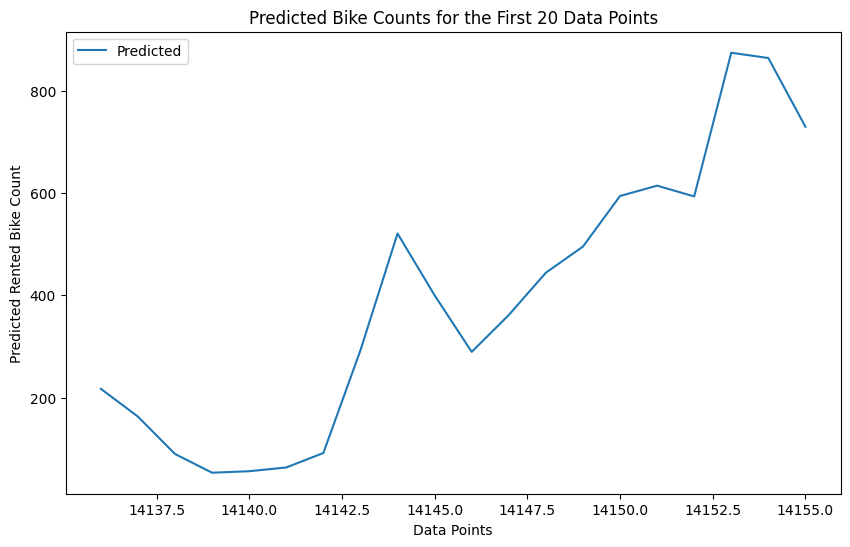

In [57]:
# Prédictions sur les nouvelles données
result = predict_new_data(bike_df.copy())

In [58]:
bike_df_final.isnull().sum()

Dates                          0
Year                           0
month                          0
day                            0
hour                           0
rainfall                       0
wind_speed                     0
wind_direction                 0
temperature                    0
humidity                       0
visibility                     0
solar_radiation                0
weekday                        0
seasons                        0
holiday                        0
rented_bike_count_predicted    0
dtype: int64

In [59]:
#bike_df_final['rented_bike_count_actual'] = actual_data['__i18n__01_04_02__column__trips']
actual_data = pd.read_csv("C:/Users/39812/OneDrive - Aix Marseille Provence Métropole/Documents/Bike Project/Datasets/Data_test.csv")
bike_df_final.reset_index(drop=True, inplace=True)
bike_df_final['rented_bike_count_actual'] = actual_data['__i18n__01_04_02__column__trips']
bike_df_final.isnull().sum()

Dates                          0
Year                           0
month                          0
day                            0
hour                           0
rainfall                       0
wind_speed                     0
wind_direction                 0
temperature                    0
humidity                       0
visibility                     0
solar_radiation                0
weekday                        0
seasons                        0
holiday                        0
rented_bike_count_predicted    0
rented_bike_count_actual       0
dtype: int64

In [60]:

bike_df_final['rented_bike_count_actual'] = bike_df_final['rented_bike_count_actual'].astype(int)
bike_df_final['rented_bike_count_predicted'] = bike_df_final['rented_bike_count_predicted'].astype(int)
bike_df_final['average_error_for_each_of_the_189_stations'] = (bike_df_final['rented_bike_count_actual'] - bike_df_final['rented_bike_count_predicted'])/189
bike_df_final['average_error_for_each_of_the_189_stations'] = bike_df_final['average_error_for_each_of_the_189_stations'].astype(int)
result = bike_df_final.loc[:,['Dates', 'hour', 'weekday', 'rented_bike_count_predicted', 'rented_bike_count_actual', 'average_error_for_each_of_the_189_stations']]
result[result['weekday'] == 'Tuesday']

,Dates,hour,weekday,rented_bike_count_predicted,rented_bike_count_actual,average_error_for_each_of_the_189_stations
24,2024-08-13,0,Tuesday,268,418,0
25,2024-08-13,1,Tuesday,166,293,0
26,2024-08-13,2,Tuesday,84,177,0
27,2024-08-13,3,Tuesday,57,111,0
28,2024-08-13,4,Tuesday,49,117,0
29,2024-08-13,5,Tuesday,57,78,0
30,2024-08-13,6,Tuesday,111,161,0
31,2024-08-13,7,Tuesday,238,344,0
32,2024-08-13,8,Tuesday,478,672,1
33,2024-08-13,9,Tuesday,348,535,0


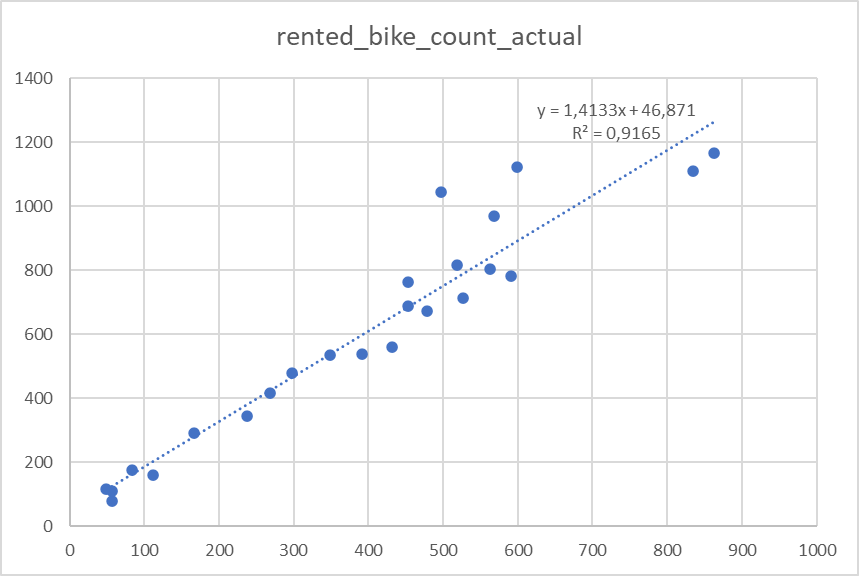